<a href="https://colab.research.google.com/github/rita-milani/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# **Credit Card Fraud Detection**

---
In this project, we are going to tackle one of the main worries of financial institutions and fintechs, **Credit Card Fraud**. According to the 2020 Annual Criminal Online Activity Report by [Axur](https://conteudo.axur.com/pt-br/relatorio-da-atividade-criminosa-online-no-brasil-2021?utm_campaign=Atividade%20Criminosa%20Online%20no%20Brasil%20em%202021&utm_source=linkedin&utm_medium=imprensa&utm_term=G1), a cybersecurity company, **Brazil leads the credit card fraud ranking**, accounting for **45% of the global cases**. The number of phishing cases increased 99,2% compared to 2019 mainly due to the pandemics, which prompted people to stay at home. 

But as the number of frauds increased, also did the number of avoided frauds. According to [E-Commerce Brasil](https://www.ecommercebrasil.com.br/noticias/dia-consumidor-fraudes-evitadas/), between March 2nd and March 15th 2022, a period marked by Consumer Day in Brazil, **over R$ 150 million in fraud was avoided**, a 13,4% increase over the last year. This means over 120 thousand fraud attempts were not successful due to early detection. 

<p align=center>
<img src="https://media.istockphoto.com/photos/fraud-alert-concept-with-security-lock-on-fake-credit-cards-picture-id1307675090?b=1&k=20&m=1307675090&s=170667a&w=0&h=MR5AOIu9QvWVTEIRKPBQv-zoVKKN0LD_O5A3pwiDvBw=", width= 40%></p>



The detection and prevention of such frauds are extremely important for financial institutions, given that this type of crime brings huge losses for the institution and the clients. 

However, the opposite can bring problems too. The over detection (or false positives for frauds) can be inconvenient, blocking purchases detected as atypical.

For all of these reasons, the investment in fraud detections field through IA is growing continuously. A Machine Learning Algorithm together with a big data volume can be used and improved tospare millions. And this is the challenge, to improve always tha algorithm use to inhibit and avoid fraudulent transactions.



##**Outline**

**1. Import the data**
- First, we will import the data into a dataframe and check the dataframe shape. 
- Then, we will split the dataset into train and test subsets. 

**2. Exploratory Data Analysis (EDA)**
- We will explore the dataset for null values, statistical analysis, data balance and distribution (histograms, boxplots and KDE).

**3. Data Preparation**
- Standardize features, split train dataset into train and validation for model training and evaluation, balance the dataset. We will also plot the correlation matrix.

**4. Machine Learning - Model Selection**
- We will train and evaluate two classification models, Logistic Regression and Decision Tree.

**5. Forecast on the Test Set**
- Next, we will run a forecast using the test set on the selected model and evaluate the performance.

**6. Conclusion**

## **1. Importing Data**

The data we are using were released by European credit card companies. The dataset covers a range of two days in September 2013, when 492 frauds were detected among almost 280 thousand transactions. As we can see, the data is extremely unbalanced. That means that only a tiny share of the data returns a positive event, that is, transaction fraud. 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

Another important detail is that all the features (independent variables) are numerical, and due to data privacy, are not identified by name. They are identified by $[V1, V2, V3 \dots, V28]$. 



[At the original data source page](https://www.kaggle.com/mlg-ulb/creditcardfraud), it was also informed that the variables went through a transformation known as PCA, or Principal Component Analysis. This transformation allows the dimensionality reduction, but keeping important information. In this dataset, these components obtained through PCA are the V named variables.  

And finally, there are `Amount` and `Time` features. The first one measures the fraud values, and the second contains the time elapsed between each transaction and the first transaction. The dependent variable, `Class`, is categorical, and it takes value 1 for fraud and 0 for normal transactions.

We will start installing and importing the libraries:



In [2]:
!pip install scikit-plot

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

sns.set_style('dark')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler


%matplotlib inline

Next step is to import the dataset into a dataframe structure. 

We will see that the original dataset has **284807 entries** (or transactions registered during the timeframe) and 31 features or variables. 

Then, we proceed splitting it into train and test subsets. This step is important because we will work with **Machine Learning Algorithms**, which will **train a model** and **run a forecast** based on it. For better performance, the model has to be trained on one subset and evaluated. And in order to find out if the model performance is really good, the forecast has to be run on a entirely new dataset that did not go through a training process, so we use the test subset. 

In [4]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# import data to a dataframe
df = pd.read_csv(file_path)

# verify shapes
print('Original Dataframe Shape: \n', df.shape)
print("\nThe dataframe has {} entries and {} features".format(df.shape[0], df.shape[1]))

# split the data into train and test subsets
test = df.sample(frac=0.15, random_state=0)

# drop test lines from df
df = df.drop(test.index)

# verify new subsets shape
print('\nTest Subset Shape: \n', test.shape)
print('\nTraining Subset Shape (new df): \n', df.shape)

Original Dataframe Shape: 
 (284807, 31)

The dataframe has 284807 entries and 31 features

Test Subset Shape: 
 (42721, 31)

Training Subset Shape (new df): 
 (242086, 31)


There are different ways to split the dataset, but here we used the `df.sample`. Later, we will use the `train_test_split` method from Scikit Learn. We specified the share of data for **test set** at 15%. Later, we checked that it was correctly created with 15% of the original dataset entries. The **train set**, with 85% of the remaining data, becomes our new `df`. We are going to proceed with our analysis on this dataset. 

Now, we can go to the next step, the Exploratory Data Analysis (EDA).

##**2. Exploratory Data Analysis**

In this step, we will explore our data statistically. We want to understand how the variables behave, if they follow any distribution, if they behave differently regarding fraudulent and regular transactions, if they have outliers or extreme values, and if they are balanced. **This step is crucial because all of this information will guide us on how we should prepare the data before we apply any Machine Learning Algorithm, otherwise we can generate a biased model and get innacurate predictions.**



####**2.1 First entries**
First, let's take a look at the dataframe. How are the variables disposed, their value range. A quick look at the first 5 entries should suffice. 

In [5]:
# check first 5 entries
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


####**2.2 What are the variable types? Are there any null values?**
When loading a dataset, it is quite common to happen that data are not homogeneous. The variables can be characterized as objects or any other different types, which can result in problems and inconsistencies while trying to perform simple operations, as numbers and dates are not recognized as such. Also, it is not uncommon that some datasets come with a huge amount of blank values, which will affect our statistics and model training. 



In [6]:
# variables types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242086 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    242086 non-null  float64
 1   V1      242086 non-null  float64
 2   V2      242086 non-null  float64
 3   V3      242086 non-null  float64
 4   V4      242086 non-null  float64
 5   V5      242086 non-null  float64
 6   V6      242086 non-null  float64
 7   V7      242086 non-null  float64
 8   V8      242086 non-null  float64
 9   V9      242086 non-null  float64
 10  V10     242086 non-null  float64
 11  V11     242086 non-null  float64
 12  V12     242086 non-null  float64
 13  V13     242086 non-null  float64
 14  V14     242086 non-null  float64
 15  V15     242086 non-null  float64
 16  V16     242086 non-null  float64
 17  V17     242086 non-null  float64
 18  V18     242086 non-null  float64
 19  V19     242086 non-null  float64
 20  V20     242086 non-null  float64
 21  V21     24

In [7]:
(df.isnull().sum()/df.shape[0]).max()

0.0

As we can see, the dataframe consists of 31 features, all of them are float type (decimal), except for the Class variable, constituted by integers. We also conclude that there are no null values in the dataset.

####**2.3 Descriptive Statistics**

Next, we can print a statistical description of the features. As there are many variables, we will proceed with more detailed analysis later. Anyway, this table is a good start to have a hint about variable distribution and presence of outliers. 

As it was pointed out at the beginning, the V variables were already transformed through a PCA, so they don´t present discrepant values. However, the variable `Amount`presents a very **discrepant maximum value**, of almost 20 thousand euro, far above the 88 euro mean. It is also possible to detect that, despite of the outliers, great part of the transaction amount lies below 77.58 euro (75% of the data).

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


####**2.4 Is the dataset balanced?**

This does not seem to be a straightforward question when dealing with an extensive dataset. But one has to take a step back and consider the nature of the problem. We are aiming to detect fraudulent transactions on a limited timeframe (2 days). Although **hundreds of thousands of transactions** were registered, **we do not expect the same magnitude of fraud incidence**. Therefore, we infer that the **dataset is unbalanced**. We will check it below:

0    241668
1       418
Name: Class, dtype: int64

Frauds make 0.17% of the dataset.



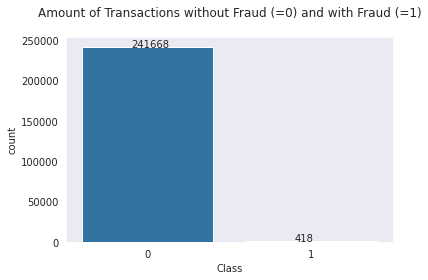

In [9]:
# check for unbalanced data
print(df.Class.value_counts())
print('\nFrauds make {:.2f}% of the dataset.\n'.format(df[df.Class==1].shape[0]/df.shape[0]*100))

# countplot to check if data is unbalanced
fig, ax = plt.subplots()

sns.countplot(x='Class', data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+80))

ax.set_title('Amount of Transactions without Fraud (=0) and with Fraud (=1)\n')


plt.tight_layout();

It´s possible to confirm through the `.value_counts()` method and through the bar chart that the dataset is **highly unbalanced**. For over 240 thousand regular transactions in the training set, only 418 are fraudulent ones. That makes only **0.17% of the total**. Thus, during data preparation, we will need to balance the dataset in order to get a **non-biased model**. 

####**2.5 Features Distribution along Time**
We have many features, most of them unidentified. But we can work with the known ones, `Class`, `Amount`, and `Time`. One way to identify differences is to **analyze the frequency of fraud and non-fraud transactions along time** through a **histogram**. Do they have a similar pattern or do they differ significantly? We will do the same analysis for the `Amount`, or value of the transactions along time, separated by fraud and non-fraud operations. 

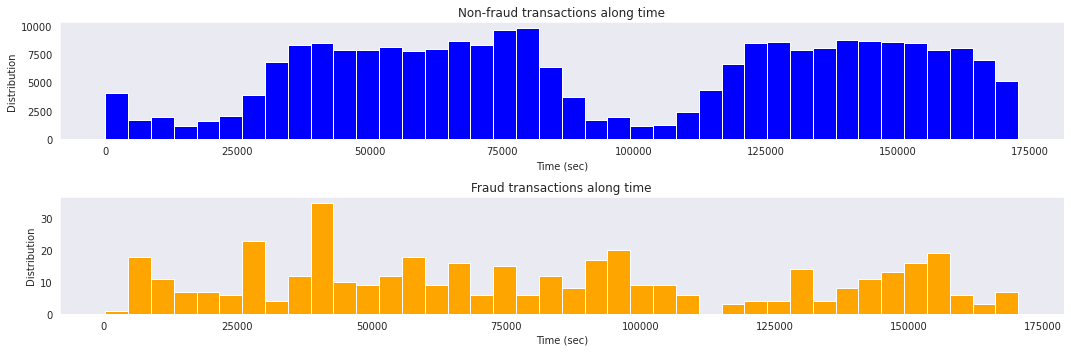

In [10]:
# plot fraud and non-fraud distribution along time
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

df[df.Class==0].Time.hist(ax=ax1, color='blue', label='Non-fraud', bins=40)
ax1.grid(False)
ax1.set_title('Non-fraud transactions along time')
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Time (sec)')

df[df.Class==1].Time.hist(ax=ax2, color='orange', label='Fraud', bins=40)
ax2.grid(False)
ax2.set_title('Fraud transactions along time')
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Time (sec)')

plt.tight_layout();

We can see that, regarding the frequency, there is a resemblance in the fraud transaction distribution, despite of the magnitude difference. **There are two clusters of transactions along the time, for both operation types**. That reveals a **seasonal pattern in transaction time**. Now we will plot the same graph for the transaction values.

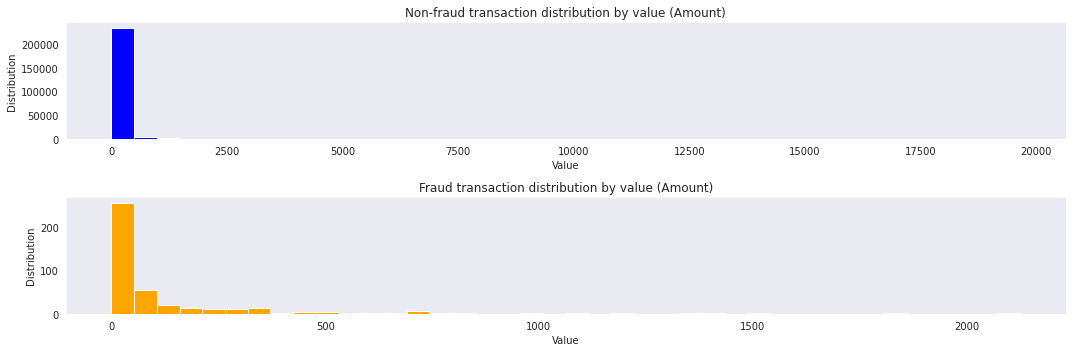

In [11]:
# plot fraud and non-fraud transactions distribution by amount
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

df[df.Class==0].Amount.hist(ax=ax1, color='blue', bins=40)
ax1.grid(False)
ax1.set_title('Non-fraud transaction distribution by value (Amount)')
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Value')

df[df.Class==1].Amount.hist(ax=ax2, color='orange', bins=40)
ax2.grid(False)
ax2.set_title('Fraud transaction distribution by value (Amount)')
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Value')

plt.tight_layout();

The first thing we can see is that the **amount differs significantly**. **Non-fraud transactions have a wider range**, reaching tens of thousands of euro, while the **fraud transactions** have a **more limited reach**. This indicates that **scammers keep their fraud attempts at low values in order not to raise suspicions**.

Another characteristic of the histograms plotted above is that the **features do not follow a normal distribution**, so we will need to **standardize** them during the Data Preparation. 

Anyway, it is interesting the fact that for the `Amount` graphs, the data is more concentrated in the left part of the plot, but still have a wide range, despite of the magnitude. This points to the presence of **outliers** in the features, values far beyond the majority of data. A way to detect them is to use the Box Plot.

####**2.6 Box Plot - Outliers Detection**
A Box Plot is a chart that depicts the statistical distribution of a variable. It is a graph that divides the data into quartiles, so you can see where are the 25% of the data, 50% (median), 75% and so on. The dots beyond the limits are the outliers. You can learn more about Box Plot reading my article [Understanding: Box Plot, a Statistical Portrait](https://medium.com/@rita.milani/understanding-box-plot-a-statistical-portrait-2181fdf01842). 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


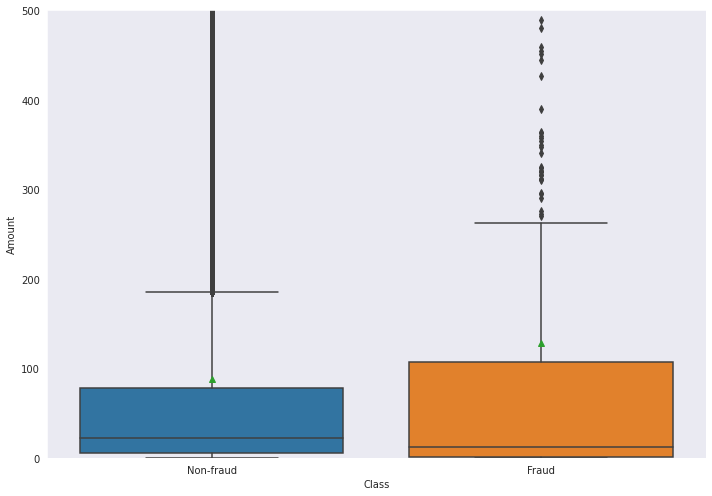

In [12]:
# detect outliers for fraud transactions
fig, ax = plt.subplots(figsize=(10,7))

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim(0, 500)
plt.xticks([0,1], ['Non-fraud', 'Fraud'])

plt.tight_layout();


In [13]:
# verifying fraud mean and median values
df[(df.Class==1) & (df.Amount<2000)]['Amount'].describe()

count     417.000000
mean      123.706859
std       249.477727
min         0.000000
25%         1.000000
50%        11.400000
75%       106.550000
max      1809.680000
Name: Amount, dtype: float64

We plot the `Amount` distribution by Class, fraud and non-fraud transactions, and we can see that there are outliers in the distribution, **values far above the respective means**, indicated by the green triangle.It´s noticeable that there are **more outliers in regular transactions that fraudulent ones, confirming what we saw in the histogram: that scammers prefer to keep their transaction values low**. This plot also shows a **different distribution of transactions value by fraud and non-fraud**, which will contribute to the Machine Learning model training. 



####**2.7 KDE - V Variables Distribution**

The density plot is very useful to visualize and compare the features **distribution for each class** and highlight the most relevant ones for **anomaly detection**.

Like in the histogram, we seek here for **distributions that differ according to the Class**, allowing us to identify frauds more easily. Here we use KDE (Kernel Density Estimates) graphs, and we can observe that features `V3`, `V4`, `V10`, `V11`, `V12`, `V14` and `V17` have **very distinct distributions** for fraud and non-fraud transactions. 

By the other hand, features like `V8`, `V13` and `V15` have **very similar distributions**. Regarding these variables, we can say that their behaviour for fraud and regular transactions do not present significantly different patterns.

Besides this, we can notice through the plots that the unknown **V features** follow a **normal distribution**, so the data is already **standardized**. 

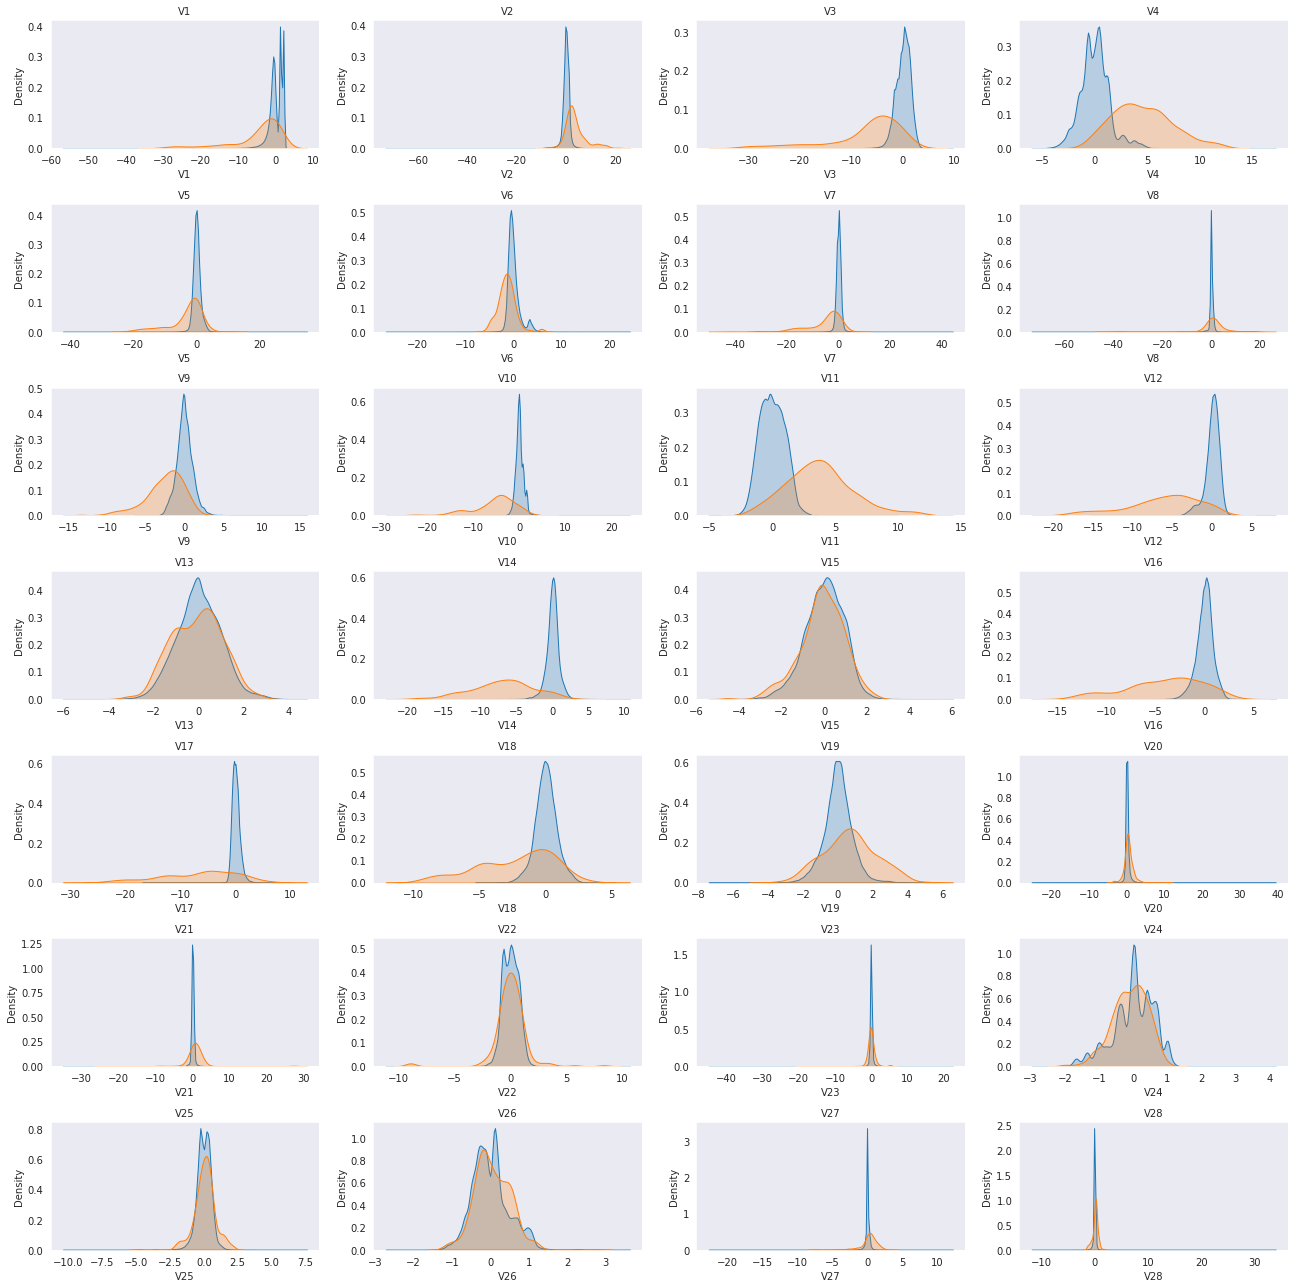

In [14]:
# verify other features distribution
column_names = df.drop(['Class','Amount','Time'], axis=1).columns
num_plots = len(column_names)

df_class_0 = df[df.Class==0]
df_class_1 = df[df.Class==1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))

idx=0
for col in column_names:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label='Class 0', shade=True)
  sns.kdeplot(df_class_1[col], label='Class 1', shade=True)
  plt.title(col, fontsize=10)
plt.tight_layout();

Briefly summing up, from the EDA we can conclude that:


*   Our dataset is composed by **integers and decimals**;
*   Our dataset has **no null values**;
* The data is **highly unbalanced**;
* Fraud and non-fraud transaction values present **different distribution patterns, with lower values for fraudulent operations**;
* Some V features have **similar distribution** for fraud and regular transactions, meanwhile others present a **different pattern**;
* V features **are standardized**, but `Time` and `Amount` are **not**.



## **3. Data Preparation**

From the EDA, we conclude that we need to:
* Standardize `Time` and `Amount` features;
* Balance the data;

Before continuing to Machine Learning, we also need to:
* Split the train set (df) into train and validation subsets.

At the end of this section, we will also plot a **Correlation Matrix** of the dataset before and after the data preparation.

###**3.1 Standardize `Time` and `Amount`**

We saw in the previous section that the `Amount` variable is not standardized. The same goes for `Time`. All the other ones were transformed through PCA. But why is it important to standardize the variables? Because each one of the **non-standardized features** present **different magnitudes**, variation and so on, which can **bias the model training**, mainly if they have higher values. 

For this purpose, we will use the **StandardScaler()** method, so the variables get a similar magnitude. Also, the Standard Scaler transforms the variable in such a way that the **standardized variable** has **mean 0 and standard deviation 1**.

In order to transform the variables, we need to make a dataframe copy, because we will transform these variables and replace them in this new dataframe.

After the tranformation, we can confirm that the new `std_amount` and `std_time`variables have both **mean 0 and standard deviation 1**.


In [15]:
# standardize Time and Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# check first entries
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


In [16]:
# check mean and standard deviation for the transformed features
print('The standardized Amount variable has mean {:.2f}, and standard deviation {:.2f}.'.format(df_clean['std_amount'].mean(), df_clean['std_amount'].std()))
print('The standardized Time variable has mean {:.2f} and standard deviation {:.2f}.'.format(df_clean['std_time'].mean(), df_clean['std_time'].std()))

The standardized Amount variable has mean 0.00, and standard deviation 1.00.
The standardized Time variable has mean 0.00 and standard deviation 1.00.


###**3.2 Split the Dataset into Train and Validation Subsets**
Before splitting the dataset intro train and validation, we have to **specify X and y variables for modeling purposes**. And that is quite simple. X variables are the independent variables or explanatory variables. y variable is the dependent variable, the one that we are trying to predict. In our case, the `Class` variable. So, the X variable is set by simply dropping the `Class`variable from the rest of the matrix. 

Now, to train/validation split. At the beginning, we splitted the original dataset into **train and test sets**. This is necessary because, once the most appropriated model is selected, we will **run the final forecast using the test set**. But here, we need a 'test' set in order to test each of our models to evaluate them. Remember that **we cannot use the test set because it is set apart for the final forecast**. So we have to **split our train set into train and validation sets**. This **validation set** will be used to **evaluate the performance of each model**. Here, we will use the `train_test_split()` method. 

We also want to make sure that at each set, the **proportion of classes are equal**. That is, if the train test has 90% of 1 values and 10% of 0, the validation set must have also 90% of 1 and 10% of 0. For this, we will use the `stratify=True`.


In [17]:
# split variables into X and y
X = df_clean.drop('Class', axis=1)
y = df.Class

# split data into train and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

###**3.3 Balancing Data**

We saw at the previous section that the data are **highly unbalanced**. That is, there is a great amount of one class, and a tiny amount of the other. In our case, **most of the transactions are regular, and only 0.17% are fraudulent**. This can be a problem because we want to predict exactly the amount of fraudulent operations. But for some Machine Learning Algorithms, if this amount is tiny, **the model may not detect it correctly or may even ignore it**. 

Thus, **balancing** the dataset so that the **fraction of frauds gets more representative in the feature** is the way to **prevent under detection**. There are several ways of doing it, like *oversampling* and *undersampling* (these are just two of the most common ways, there are other methods). 

* **Random Oversampling**: duplicates examples from the minority class in the training dataset and can result in overfitting for some models. 
* **Random Undersampling**: deletes the examples from the majority class, but can result in data loss to a model.

The `imblearn` library has an easy way to apply these data balancing techniques. We chose to use the **Random Undersampling** to preserve the minority class. As a result, the shape of the feature is reduced from 180 thousand entries to only 626, from which 313 represent fraud transactions and 313 represent regular transactions, so **the classes have equal weight**. We also plot a barchart to show the classes. 




Frequency for each Class after Sampling
 0    313
1    313
Name: Class, dtype: int64

Shape of y_train (before sampling):
 (181564,)

Shape of y_rus:
 (626,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


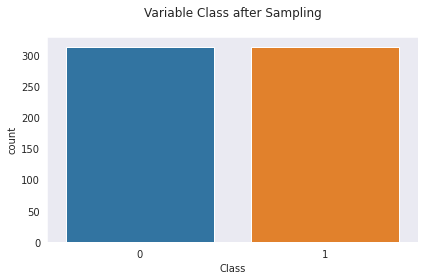

In [18]:
# under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# check for classes balance
print('\nFrequency for each Class after Sampling\n', pd.Series(y_rus).value_counts())

# plot new Class distribution
fig, ax = plt.subplots()
sns.countplot(y_rus, ax=ax)
ax.set_title('Variable Class after Sampling\n')

plt.tight_layout();
print('\nShape of y_train (before sampling):\n', y_train.shape)
print('\nShape of y_rus:\n', y_rus.shape)

###**3.4 Correlation Matrix**
After balancing data, we can check the correlation matrix to identify which features are more correlated among themselves.

Here, it becomes clear that **before data balancing, the overall correlation was almost inexistent**, bringin no relevant information. However, **after data balancing, despite the data loss it caused, we can notice an increase in data's correlation**, stronger among the first 18 unknown features. It is possible that these features will have more relevance to the Machine Learning Model. 

As we gained more insight from data, we can proceed to the next phase, Machine Learning Algorithms.



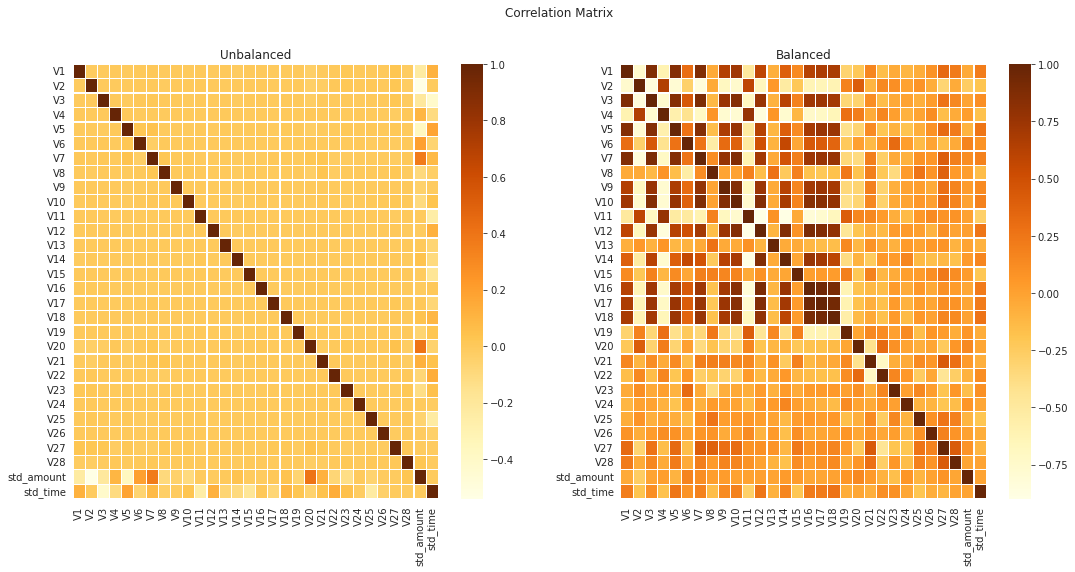

In [19]:
# check the correlation for features matrix
corr = X_train.corr()
corr_rus = X_rus.corr()

# create correlation matrix
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (18,8))

fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap='YlOrBr', ax=ax0)
ax0.set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr_rus.columns, yticklabels=corr_rus.columns, linewidths=.1, cmap='YlOrBr', ax=ax1)
ax1.set_title('Balanced')

plt.show()


## **4. Machine Learning Models**

With data prepared and after statistical and exploratory analysis, we proceed on buiding a model. As we are dealing with a **classification problem** (the transaction is regular or a fraud), we will use **Logistic Regression** and Decision Tree. 

After instancing the model, the same will be trained on balanced training data (X_rus, y_rus). Then, we will run the forecast using the validation dataset, and find out the probabilities associated to each forecast. We print the first predictions and the probabilities that justify their choice. 

### **4.1 Logistic Regression** 
The Logistic Regression is a predictive analysis algorithm based on probabilities. This means that it models the probabilities of a discrete outcome, usually a binary outcome, like yes/no, true/false, fraud/non-fraud, presence/absence of illness, and so on. 

After instancing and training the model, we perform a forecast and print the 5 first predictions. Below, we also print the probabilities of each result. For example: the first prediction is 0. The model got to this result because it calculated a 98% probability of the result being 0 and 1,16% probability of the result being 1. 

In [20]:
# instantiate and train a model
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# run the forecast using the validation dataset
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)

# probabilities linked to each forecast
print('y_pred: \n', y_pred[0:5])
print('\n y_prob: \n', y_prob[0:5])

y_pred: 
 [0 0 0 0 1]

 y_prob: 
 [[0.58371162 0.41628838]
 [0.99668446 0.00331554]
 [0.83600783 0.16399217]
 [0.97335257 0.02664743]
 [0.36530704 0.63469296]]


#### **4.1.1 Evaluating the Logistic Regression Model**

Model trained, forecasts ready. What should we do now? 

We evaluate the model to check if their forecasts are appropriated. As our problem deals with unbalanced data that we had to adjust, accuracy will be somewhat biased upwards with a low prediction rate in the test subset, thus it is not the most appropriated measure. 

To check the performance for fraud detections, we will plot the `Confusion Matrix`  and the `Classification Report`, in which we will check the **recall column**. 

Another interesting metric for unbalanced data is **AUC ROC (Area Under the Receiver Operating Characteristics)**. Basically, it is a probability curve that measures the model capacity of classifying correctly the classes. The **closer to 1 the probability, the better the model accuracy** to predict the classes correctly. The **closer to 0, the worse the model´s performance**. 

Classification Report
               precision    recall  f1-score   support

           0     0.9998    0.9581    0.9785     60417
           1     0.0365    0.9143    0.0703       105

    accuracy                         0.9580     60522
   macro avg     0.5182    0.9362    0.5244     60522
weighted avg     0.9982    0.9580    0.9770     60522

Model Accuracy: 0.9580

AUC: 0.9362



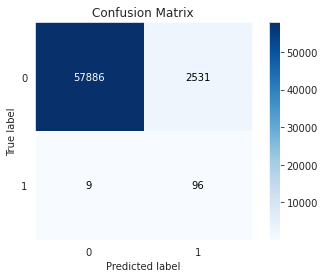

In [21]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# get classification report
print('Classification Report\n', classification_report(y_val, y_pred, digits=4))

# get model accuracy
print('Model Accuracy: {:.4f}\n'.format(accuracy_score(y_val, y_pred)))

# print area under the curve
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred)))

Let´s begin by the Confusion Matrix. We have to understand that the **rows represent the true values**. So row 0 represents true regular transactions, and row 1, true fraud. **Columns represent the predictions**, so column 0 shows predicted regular transactions and row 1, predicted fraud. 

* There are **60417 true regular transactions**. From these, **57886 were correctly predicted as regular transactions (95%)** and **2531 were incorrectly predicted as fraud transactions (5%)**.

* There are **105 fraudulent transactions**, of which **9 were incorrectly predicted as regular (8.5%), and 96 correctly predicted as fraudulent (91.5%)**.

Now, the **Classification Report**.
* Precision: from the predicted positives, which share was correct? (TP/(TP+FP)). So, **57886/(57886+9) = 99.9%**.
* Recall: from the real positives, which share was correctly predicted as so? (TP/TP+FN)). So, **57886/(57886+2531) = 95.8%**.

And for the **AUC-ROC, 93.6%**.





### **4.2 Decision Tree** 
The Decision Tree is a supervised learning method used for classification. It is designed to predict a discrete outcome by learning simple decision rules based on the features in a tree-like model. 

In [22]:
# import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate and train a model
model_dt = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model_dt.fit(X_rus, y_rus)

# forecast using validation subset
y_pred_dt = model_dt.predict(X_val)

# probabilities linked to each forecast
print('y_pred_dt:\n', y_pred_dt[0:20])
print('\ny_val:\n\n', y_val[0:20])



y_pred_dt:
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

y_val:

 199469    0
274557    0
214682    0
8047      0
249805    0
168301    0
46055     0
99100     0
127965    0
270768    0
258240    0
37821     0
22930     0
118731    0
131498    0
13738     0
110192    0
92043     0
132116    0
43983     0
Name: Class, dtype: int64


####**4.2.1 Visualizing the Decision Tree**

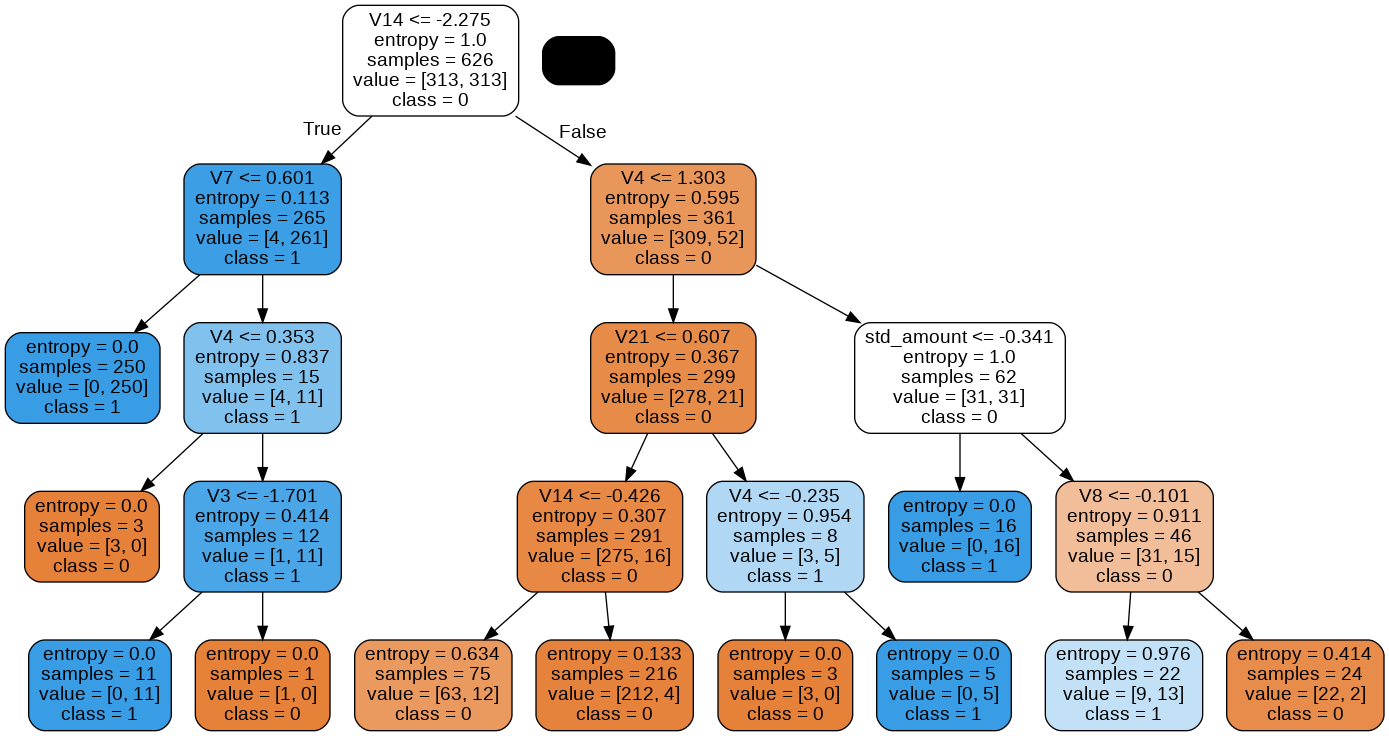

In [23]:
# import the libraries
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# create and plot the DOT
dot = export_graphviz(model_dt, filled=True, rounded=True, feature_names= X_rus.columns, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)
Image((graph.create_png()))



####**4.2.2 Evaluating the Decision Tree Model**

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     60417
           1       0.02      0.92      0.04       105

    accuracy                           0.93     60522
   macro avg       0.51      0.93      0.50     60522
weighted avg       1.00      0.93      0.96     60522

Accuracy: 0.9289

AUC: 0.5110


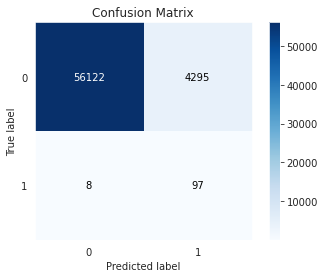

In [25]:
# confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred_dt)

# classification report
print('Classification Report\n',classification_report(y_val,y_pred_dt))

# model accuracy
print('Accuracy: {:.4f}\n'.format(accuracy_score(y_pred_dt, y_val)))

# area under the curve (AUC-ROC)
print('AUC: {:.4f}'.format(roc_auc_score(y_pred_dt, y_val)))



Again, let´s begin by the Confusion Matrix.
* from the **60417 true regular** transactions, **56122 were correctly predicted as regular (92.9%)**, and **4295 were incorrectly predicted as fraud (7.1%)**.

* from the **105 true fraudulent** transactions, **8 were incorrectly predicted as regular (7.6%)**, and **97 were correctly predicted as fraudulent (92,4%)**.

From the Classification Report:

* Precision: from the predicted positives, what percentage was correct? **56122/(56122+8) = 99.9%**.

* Recall: from the real positives, what share was correctly predicted as so? **56122/(56122+4295) = 92.8%**.

And for the **AUC-ROC: 92.9%**.

#### **Decision**

Now that we have the evaluation for both models, we can compare their performance. **Logistic Regression** has a **better performance** both at the Classification Report and AUC-ROC, thus it will be our chosen model. 

##**5. Forecast using the Test Set**
Once that we chose the more appropriated model, Logistic Regression, we can finally proceed to the forecast in an independent set that was not used before. 

At the beginning of the project, we splitted the original dataset into train and test sets. 

Now that we explored and prepared the data, instanced the model and ran the forecast, it is time to find out the potential of this model by **running the forecast on the test set**. 

We will now use the model we trained with this new subset. However, in order to have fair results, it is important that the **data from this set** have the **same conditions as the train set**, so some transformations are necessary. 

Thus, we need to **standardize `Time` and `Amount` features**. We will **not balance the data**, as the test dataset is already reduced, and we would lose a lot of data. As **it is going to be used for forecast and not for modeling**, it is not necessary to balance it.

In [31]:
# stdandardize Time and Amount features from the test set
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1,1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1,1))

test_clean.drop(['Amount', 'Time'], axis=1, inplace=True)

# check first entries
test_clean.head()

# print mean and standard deviation from standardized features
print('The standardized Amount feature has mean {:.2f} and standard deviation {:.2f}.'.format(test_clean['std_amount'].mean(), test_clean['std_amount'].std()))
print('The standardized Time feature has mean {:.2f} and standard deviation {:.2f}'.format(test_clean['std_time'].mean(), test_clean['std_time'].std()))

The standardized Amount feature has mean -0.00 and standard deviation 1.00.
The standardized Time feature has mean -0.00 and standard deviation 1.00


Now we have to split the test dataset into X and y before we can proceed with the forecast as we will use the X_test to run it:

In [35]:
# split test set into X and y
X_test = test_clean.drop('Class', axis=1)
y_test = test_clean['Class']

# run the forecast using the Logistic Regression model
y_pred =  model.predict(X_test)
y_proba = model.predict_proba(X_test)

# print first forecast entries
print('y_pred', y_pred[0:10])
print('y_proba', y_proba[0:10])

y_pred [0 0 0 0 0 1 0 0 0 0]
y_proba [[0.91122095 0.08877905]
 [0.95731614 0.04268386]
 [0.70767129 0.29232871]
 [0.97821442 0.02178558]
 [0.97325233 0.02674767]
 [0.27088239 0.72911761]
 [0.68136869 0.31863131]
 [0.98502861 0.01497139]
 [0.99754183 0.00245817]
 [0.7858877  0.2141123 ]]


Above we have a small sample of the forecast using the test set and the probabilities associated to each class that based the class choices. Let's evaluate the model performance on this never used test set:

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     42647
           1       0.04      0.93      0.08        74

    accuracy                           0.96     42721
   macro avg       0.52      0.95      0.53     42721
weighted avg       1.00      0.96      0.98     42721

AUC-ROC: 0.9464



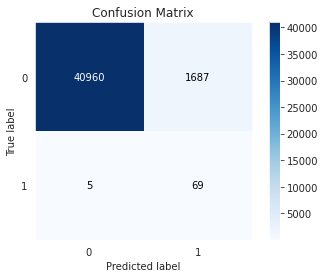

In [36]:
# plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# print the classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# print area under the curve
print('AUC-ROC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

To the analysis:

Confusion Matrix:

* from **42647 true regular transactions, 40960 were correctly predicted as regular (96.0%)**, and **1687 fraud transactions were incorrectly predicted as regular (4.0%)**.

* from **74 true fraud transactions, 69 were correctly predicted as fraud (93.2%)**, while **5 were incorrectly predicted as regular transactions (6.8%)**.

Classification Report:

* Precision: from the predicted positives, which share was correct? **40960/(40960+5) = 99.9%**.

* Recall: from the real positives, which share was predicted as so? **40960/(40960+1687) = 96.0%**

**AUC-ROC: 94.6%**

Comparing to the Logistic Regression using the validation set, we can conclude that the model performance using the test set has proved superior, with higher rates for all the indicators. 

## **6. Conclusion**

We saw that fraudulent credit card transactions are an increasing worry of financial institutions, and that Brazil accounts for a great share of it. Thus, the use of IA through Machine Learning Algorithms to increase the efficacy of fraud detections is an important tool not only for financial institutions, but also for e-commerce companies and online businesses. 

Using a credit card dataset made available by EU financial institutions as an example, we aimed at this project to find out models with an improved capacity of fraud detection. As with any dataset, we proceeded with exploring the data to understand which data preparation would be necessary in order to train the models. It turned out that the biggest problems were the unbalanced class distribution between fraudulent and regular transactions (as frauds account for a small share of the dataset) and some features that were not standardized, which could bias the model training.

Guided by the exploratory results, we standardized the variables so their magnitude would not alter the model results, and used the Random Undersampling method to balance the data, so the small share of the desired occurrence (fraud) would not be disregarded by the algorithms. Two correlation matrices revealed that, after balancing data, the correlation improved significantly, indicating that transformed, these variables would play a bigger role in the models. 

Then we followed to the modeling part using Machine Learning Algorithms. As this project deals with a classification problem, *i.e.*, if the transaction is fraudulent or regular, we opted for two classification algorithms: Logistic Regression and Decision Tree. For both, we trained the model with the balanced train set, and tested them with the validation set. Several metrics were used for the models performance evaluation. Both of them performed well according to the Confusion Matrix, Classification Report and Area Under the Curve (AUC-ROC). However, Logistic Regression performed slightly better than Decision Tree, thus we chose that model.

Using the test set, set apart for the final forecast, it was noted that that the Logistic Regression had a slightly better performance with the test set compared to the validation set, which indicates the model worked well with unknown datasets. 

Although the model showed a good performance for credit card fraud detection, there is room for further improvement. For instance, there are several methods of data balancing that could be used to contribute to the performance improvement. Furthermore, there are other classification algorithms that could be adopted together with parameter tuning to test the model performance. 